In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('trainh.csv')

In [54]:
print(str(len(df.index)))

878049


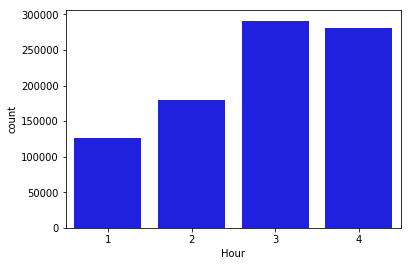

In [55]:
sns.countplot(x="Hour", data=df, color="blue")

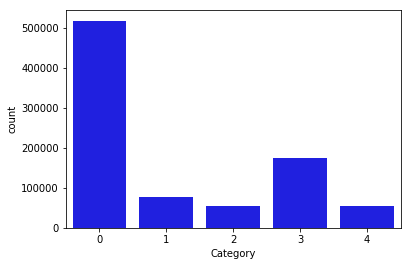

In [56]:
sns.countplot(x="Category", data=df, color="blue")

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 10 columns):
Dates         878049 non-null object
Category      878049 non-null int64
DayOfWeek     878049 non-null int64
PdDistrict    878049 non-null int64
X             878049 non-null float64
Y             878049 non-null float64
Hour          878049 non-null int64
Day           878049 non-null int64
Month         878049 non-null int64
Year          878049 non-null int64
dtypes: float64(2), int64(7), object(1)
memory usage: 67.0+ MB


In [58]:
df.isnull().sum()

Dates         0
Category      0
DayOfWeek     0
PdDistrict    0
X             0
Y             0
Hour          0
Day           0
Month         0
Year          0
dtype: int64

In [59]:
df.head(5)

,Dates,Category,DayOfWeek,PdDistrict,X,Y,Hour,Day,Month,Year
0,5/13/2015 23:53,0,4,5,-122.425892,37.774599,4,13,5,2015
1,5/13/2015 23:53,0,4,5,-122.425892,37.774599,4,13,5,2015
2,5/13/2015 23:33,0,4,5,-122.424363,37.800414,4,13,5,2015
3,5/13/2015 23:30,3,4,5,-122.426995,37.800873,4,13,5,2015
4,5/13/2015 23:30,3,4,6,-122.438738,37.771541,4,13,5,2015


In [60]:
df.drop(['Dates'], axis=1, inplace=True)

In [61]:
df.head(5)

,Category,DayOfWeek,PdDistrict,X,Y,Hour,Day,Month,Year
0,0,4,5,-122.425892,37.774599,4,13,5,2015
1,0,4,5,-122.425892,37.774599,4,13,5,2015
2,0,4,5,-122.424363,37.800414,4,13,5,2015
3,3,4,5,-122.426995,37.800873,4,13,5,2015
4,3,4,6,-122.438738,37.771541,4,13,5,2015


In [62]:
x = df.drop("Category", axis=1)
y = df["Category"]

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [65]:
from sklearn.naive_bayes import GaussianNB

In [66]:
cls = GaussianNB()

In [67]:
cls = cls.fit(x_train, y_train)

In [68]:
predictions = cls.predict(x_test)

In [69]:
from sklearn.metrics import classification_report

In [70]:
classification_report(y_test, predictions)

C:\Users\Devil\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'              precision    recall  f1-score   support\n\n           0       0.62      0.39      0.47    155290\n           1       0.00      0.00      0.00     23212\n           2       0.08      0.80      0.14     16215\n           3       0.00      0.00      0.00     52625\n           4       0.12      0.00      0.00     16073\n\n   micro avg       0.28      0.28      0.28    263415\n   macro avg       0.16      0.24      0.12    263415\nweighted avg       0.38      0.28      0.29    263415\n'

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
print(confusion_matrix(y_test, predictions))

[[59835     0 95438     0    17]
 [ 9235     0 13975     0     2]
 [ 3178     0 13037     0     0]
 [16748     0 35874     0     3]
 [ 7709     0  8361     0     3]]


In [73]:
from sklearn.metrics import accuracy_score

In [74]:
accuracy_score(y_test, predictions)

0.2766547083499421

In [75]:
from sklearn.metrics import log_loss

In [76]:
cls_probs = cls.predict_proba(x_test)
score = log_loss(y_test, cls_probs)
print(score)

1.64989724697


In [77]:
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.svm import LinearSVC

In [78]:
y = label_binarize(y, classes=[0,1,2,3,4])
n_classes = 5

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

C:\Users\Devil\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Devil\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Devil\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Devil\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Devil\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

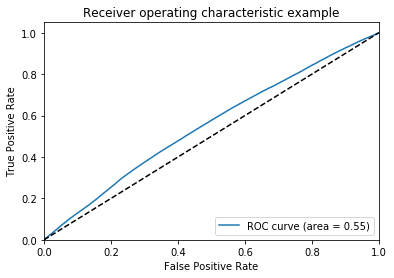

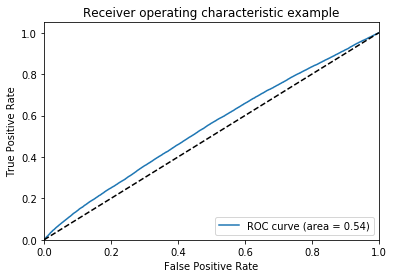

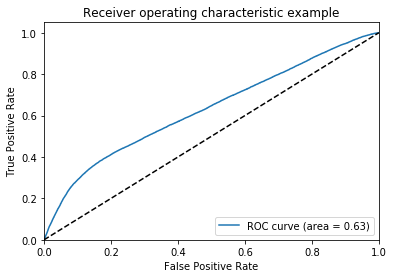

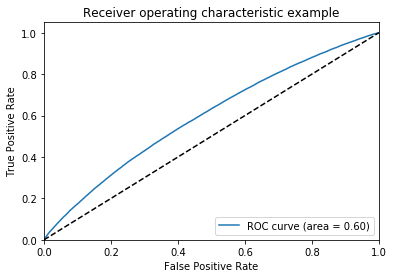

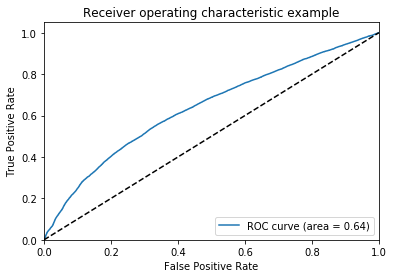

In [80]:


# classifier
clf = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = clf.fit(x_train, y_train).decision_function(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()